In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('carInsurance_train.csv')

In [3]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [4]:
df1 = df.drop(['Communication', 'Outcome'], axis=1)

In [5]:

# Drop all rows with at least one null value
df2=df1.dropna()

In [6]:
df2

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,26,may,5,-1,0,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,3,jun,1,119,1,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,11,may,2,-1,0,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,3,jun,1,-1,0,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,25,may,1,40,2,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,29,jul,19,-1,0,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,8,jul,1,-1,0,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,29,jan,1,227,3,11:27:35,11:29:14,0


In [7]:
data = df2.copy()

In [8]:
data[data['CarLoan']==data['CarInsurance']][data['CarLoan']==1]['CarLoan'].value_counts()

CarLoan
1    149
Name: count, dtype: int64

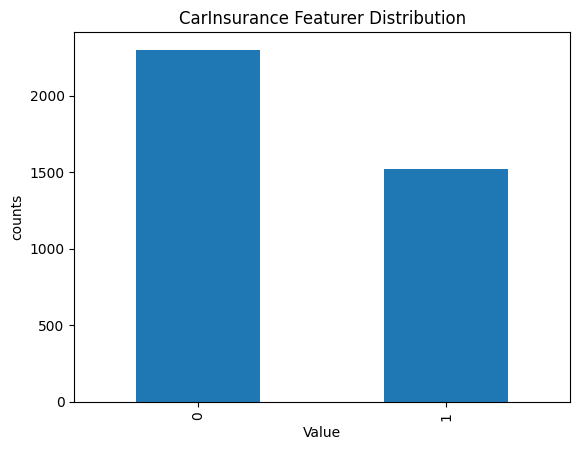

In [9]:
data['CarInsurance'].value_counts().plot(kind='bar')
plt.title('CarInsurance Featurer Distribution')
plt.xlabel('Value')
plt.ylabel('counts')
plt.show()

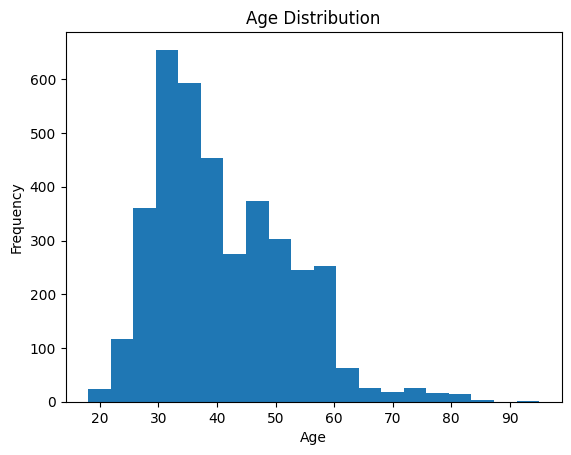

In [10]:
data['Age'].plot(kind='hist',bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

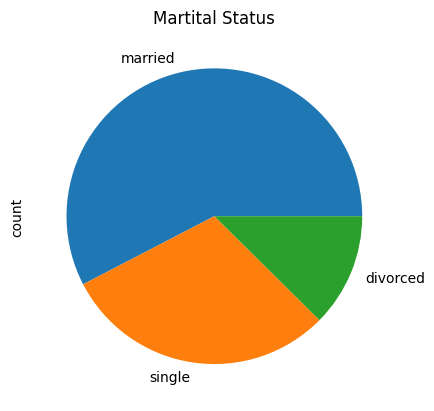

In [11]:
data['Marital'].value_counts().plot(kind='pie')
plt.title('Martital Status')
plt.show()

In [12]:
# Adding a column with Age Ranges.

def agerange(age):
    if age >= 18 and age <= 20:
        return "18-20"
    elif age >= 21 and age <= 30:
        return "21-30"
    elif age >= 31 and age <= 40:
        return "31-40"
    elif age >= 41 and age <= 50:
        return "41-50"
    elif age >= 51 and age <= 60:
        return "51-60"
    elif age >= 61 and age <= 70:
        return "61-70"
    elif age >= 71 and age <= 80:
        return "71-80"
    elif age >=81 and age <= 90:
        return "81-90"
    elif age > 90:
        return "Above 90"

In [13]:
data['Age Range']=data['Age'].apply(agerange)

In [14]:
# Adding a column with Age Ranges.

def balancerange(balance):
    if balance < 0:
        return "0"
    elif balance >0 and balance <= 10000:
        return "0-10,000"
    elif balance >10000 and balance <= 20000:
        return "10,000-20,000"
    elif balance >20000 and balance <= 30000:
        return "20,000-30,000"
    elif balance >30000 and balance <= 40000:
        return "30,000-40,000"
    elif balance >40000 and balance <= 50000:
        return "40,000-50,000"
    elif balance >50000 and balance <= 60000:
        return "50,000-60,000"
    elif balance >60000 and balance <= 70000:
        return "60,000-70,000"
    elif balance >70000 and balance <= 80000:
        return "70,000-80,000"
    elif balance >80000 and balance <= 90000:
        return "80,000-90,000"
    elif balance >90000:
        return "90,000-100,000"

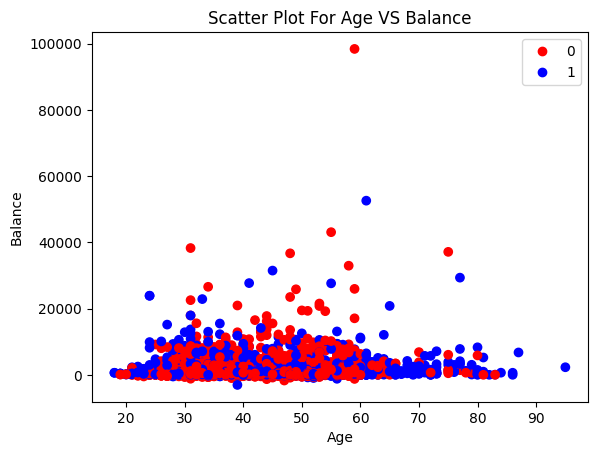

In [15]:
import matplotlib.pyplot as plt

# create data for x and y axes
x = data['Age']
y = data['Balance']

# create a dictionary to map values to colors
color_dict = {0: 'red', 1: 'blue'}

# create a list of colors based on the values in data["CarInsurance"]
colors = [color_dict[val] for val in data["CarInsurance"]]

# create scatter plot with specified colors
plt.scatter(x, y, c=colors)

# add labels and title
plt.title('Scatter Plot For Age VS Balance')
plt.xlabel('Age')
plt.ylabel('Balance')

# create a custom legend for the colors
handles = [plt.plot([],[], marker="o", ls="", color=color_dict[val], label=str(val))[0] for val in color_dict.keys()]
plt.legend(handles=handles)

# display plot
plt.show()


In [16]:
AgeRange_crosstab=pd.crosstab(index=data['Age Range'],columns=data['Job'])
AgeRange_crosstab

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
Age Range,,,,,,,,,,,
18-20,0,2,0,0,0,0,0,0,12,0,0
21-30,92,114,12,7,108,0,19,71,81,100,24
31-40,182,277,44,25,391,3,61,137,12,289,40
41-50,108,214,33,36,212,9,22,78,1,154,29
51-60,62,116,26,30,143,93,24,35,0,91,33
61-70,1,4,3,5,13,65,5,0,0,5,2
71-80,0,1,0,2,0,49,2,0,0,0,0
81-90,0,0,0,0,0,10,0,0,0,0,0
Above 90,0,0,0,0,0,1,0,0,0,0,0


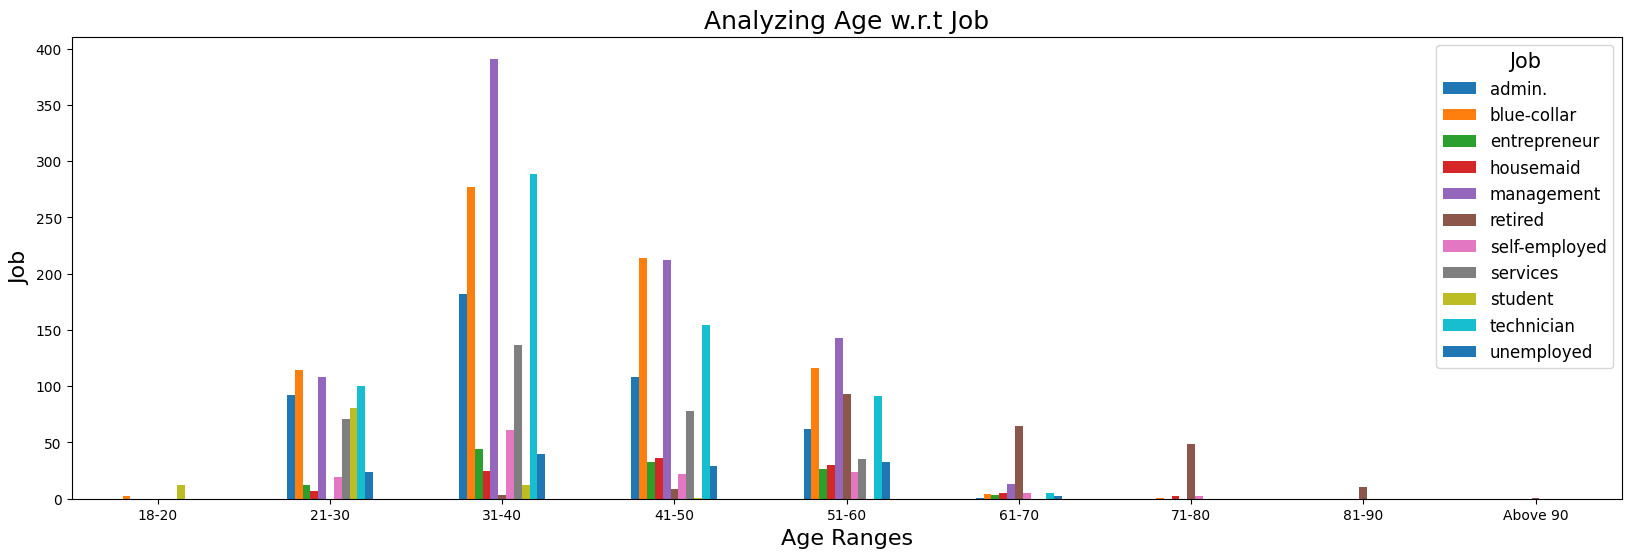

In [17]:
# Plotting the above values.

AgeRange_crosstab.plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0)
plt.xlabel('Age Ranges',fontsize=16)
plt.ylabel('Job',fontsize=16)
plt.title('Analyzing Age w.r.t Job',fontsize=18)
plt.legend(title='Job',title_fontsize=15,prop={"size":12})

In [18]:
# Let's check the age dependancy w.r.t Car Insurance Opting Decisions

Age_crosstab=pd.crosstab(index=data['Age Range'],columns=data['CarInsurance'])
Age_crosstab['Percentage Enrolled']=round(Age_crosstab[1]/(Age_crosstab[0]+Age_crosstab[1])*100,2)
Age_crosstab

CarInsurance,0,1,Percentage Enrolled
Age Range,,,
18-20,5,9,64.29
21-30,330,298,47.45
31-40,931,530,36.28
41-50,585,311,34.71
51-60,411,242,37.06
61-70,20,83,80.58
71-80,15,39,72.22
81-90,2,8,80.00
Above 90,0,1,100.00


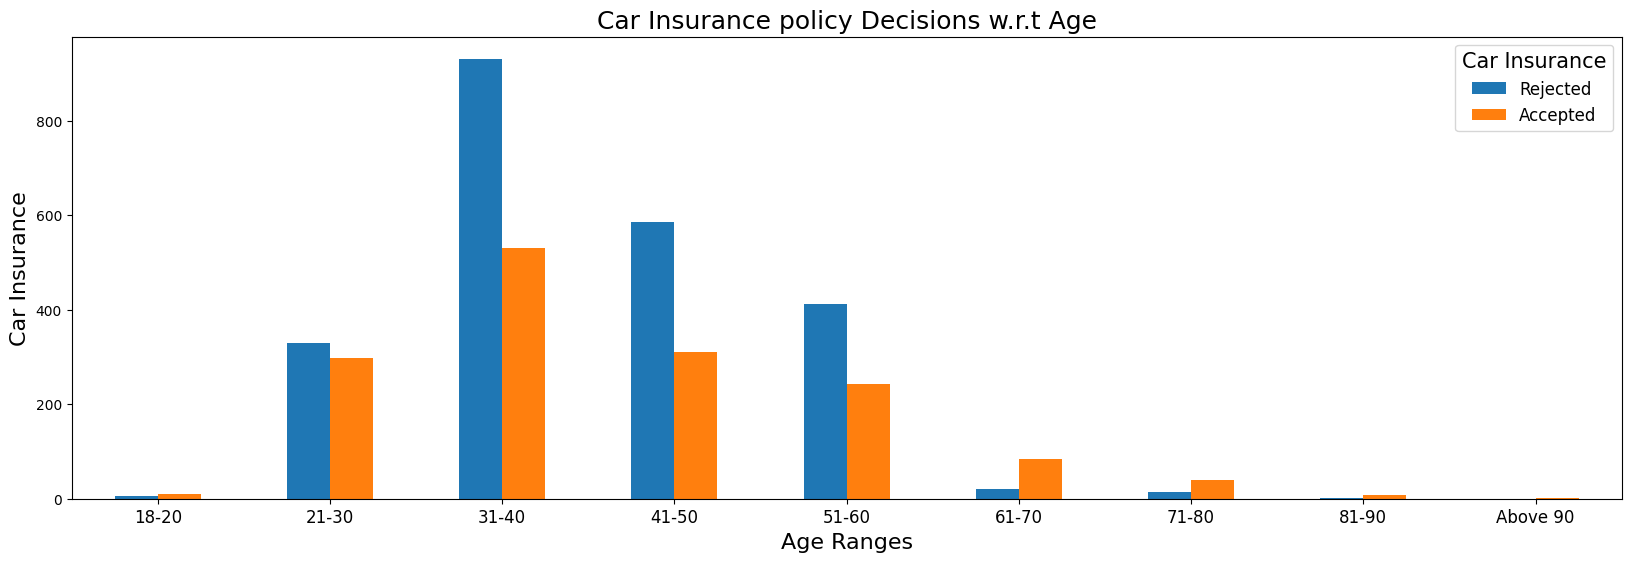

In [19]:
# Plotting the above values.

Age_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Age Ranges',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance policy Decisions w.r.t Age',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [20]:
# Let's check the Job dependancy w.r.t Car Insurance Opting Decisions

Job_crosstab=pd.crosstab(data['Job'],data['CarInsurance'],colnames=['Car Insurance'])
Job_crosstab['Percentage Enrolled']=round(Job_crosstab[1]/(Job_crosstab[0]+Job_crosstab[1])*100,2)
Job_crosstab

Car Insurance,0,1,Percentage Enrolled
Job,,,
admin.,267,178,40.00
blue-collar,517,211,28.98
entrepreneur,84,34,28.81
housemaid,69,36,34.29
management,493,374,43.14
retired,94,136,59.13
self-employed,80,53,39.85
services,213,108,33.64
student,36,70,66.04


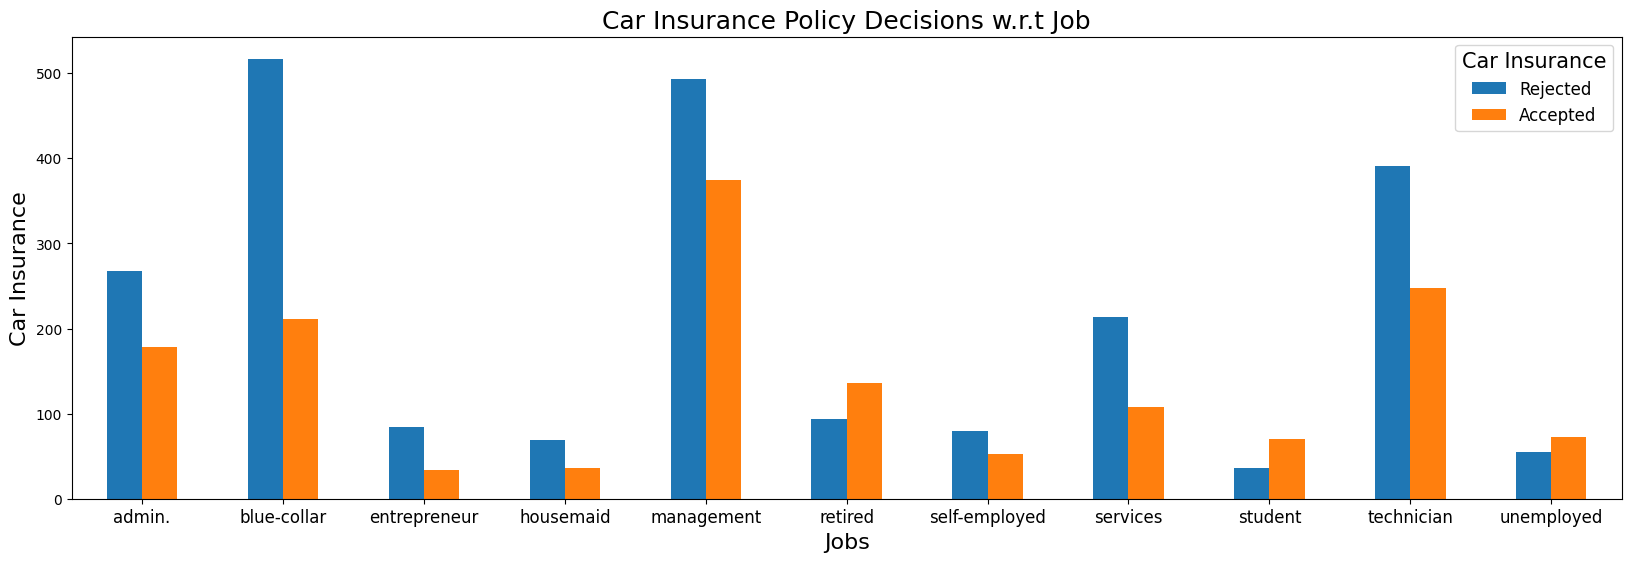

In [22]:
# Plotting the above values.

Job_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Jobs',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Job',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [23]:
# Let's check the dependancy of marital status on Car Insurance Opting Decisions

Marital_crosstab=pd.crosstab(data['Marital'],data['CarInsurance'],colnames=['Car Insurance'])
Marital_crosstab['Percentage Enrolled']=round(Marital_crosstab[1]/(Marital_crosstab[0]+Marital_crosstab[1])*100,2)
Marital_crosstab

Car Insurance,0,1,Percentage Enrolled
Marital,,,
divorced,270,204,43.04
married,1414,787,35.76
single,615,530,46.29


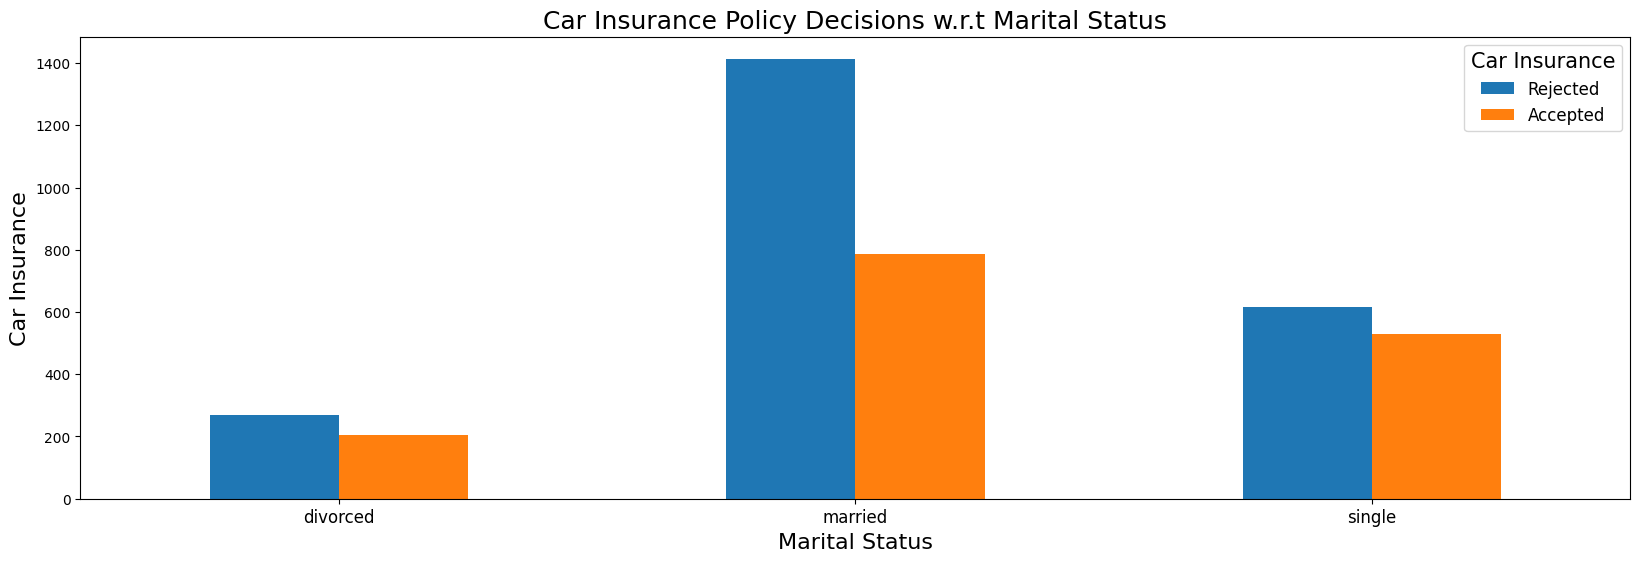

In [24]:
# Plotting the above values.

Marital_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Marital Status',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Marital Status',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [25]:
# Let's check the dependancy of Education on Car Insurance Opting Decisions

Education_crosstab=pd.crosstab(data['Education'],data['CarInsurance'],colnames=['Car Insurance'])
Education_crosstab['Percentage Enrolled']=round(Education_crosstab[1]/(Education_crosstab[0]+Education_crosstab[1])*100,2)
Education_crosstab

Car Insurance,0,1,Percentage Enrolled
Education,,,
primary,363,194,34.83
secondary,1256,727,36.66
tertiary,680,600,46.88


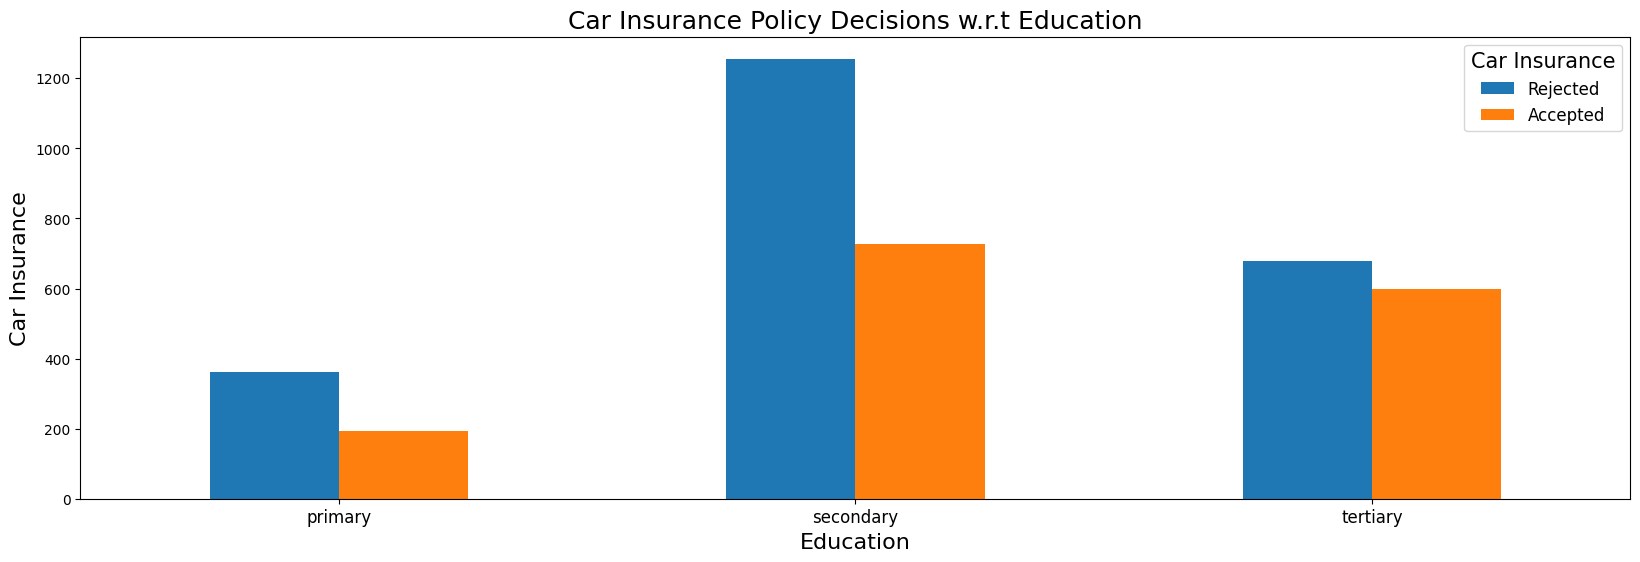

In [26]:
# Plotting the above values.

Education_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Education',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Education',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [27]:
# Converting the type of "CallStart" & "CallEnd" to Datetime.

data[['CallStart','CallEnd']]=data[['CallStart','CallEnd']].astype('datetime64[ns]')

In [28]:
# Calculating the total Call Duration

data['Call_Duration']=data['CallEnd']-data['CallStart']

# Extracting the time & converting it to seconds

data['Call_Duration']=data['Call_Duration'].dt.components['minutes']*60 + data['Call_Duration'].dt.components['seconds']
data['Call_Duration'].head()

0     70
1    185
2    340
3    819
4    192
Name: Call_Duration, dtype: int64

In [29]:
# Converting "Call Duration" to minutes.

data['Call_Duration']=data['Call_Duration'].apply(lambda x: round(x/60),2)
data['Call_Duration'].head()

0     1
1     3
2     6
3    14
4     3
Name: Call_Duration, dtype: int64

In [30]:
# Dependancy of Call Duration on Car Insurance Opting Decisions

Call_Duration_crosstab=pd.crosstab(data['Call_Duration'],data['CarInsurance'],colnames=['Car Insurance'],
                                   rownames=['Call Duration (in minutes)'])
Call_Duration_crosstab['Percentage Enrolled']=round(Call_Duration_crosstab[1]/(Call_Duration_crosstab[0]+ Call_Duration_crosstab[1])*100,2)
Call_Duration_crosstab

Car Insurance,0,1,Percentage Enrolled
Call Duration (in minutes),,,
0,113,1,0.88
1,409,17,3.99
2,566,114,16.76
3,384,151,28.22
4,236,161,40.55
5,176,107,37.81
6,111,107,49.08
7,84,95,53.07
8,66,83,55.70


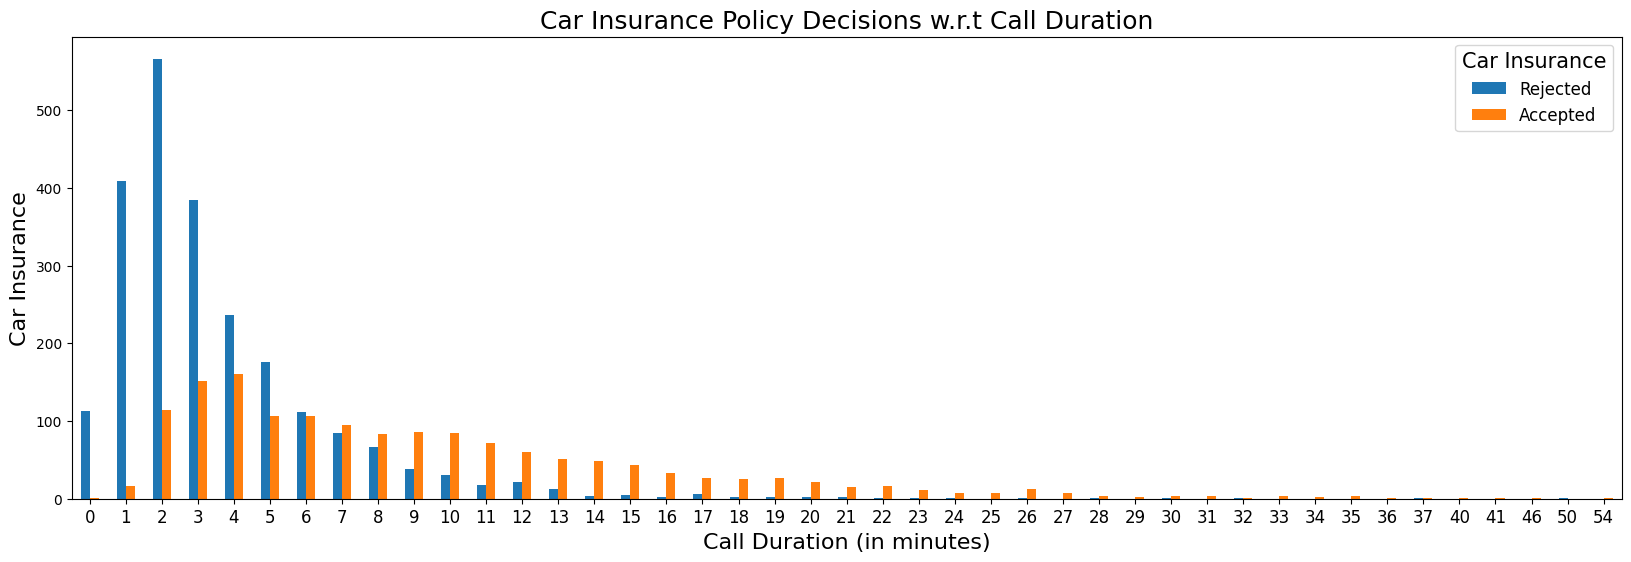

In [31]:
Call_Duration_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Call Duration (in minutes)',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Call Duration',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [32]:
# Let's categorize the Call durations for better understanding according to the mean duration.

mean=data.Call_Duration.mean()
mean

def update_duration(call):
    if(call < mean):
        return "Less than Mean Duration"
    elif(call > mean):
        return "More than Mean Duration"

In [33]:
data['Call_Duration_Mean']=data['Call_Duration'].apply(update_duration)

In [34]:
# Dependancy of Mean Call Duration on Car Insurance Opting Decisions

Mean_Call_Duration_crosstab=pd.crosstab(data['Call_Duration_Mean'],data['CarInsurance'],colnames=['Car Insurance'],
                                   rownames=['Call Duration (in minutes)'])
Mean_Call_Duration_crosstab['Percentage Enrolled']=round(Mean_Call_Duration_crosstab[1]/(Mean_Call_Duration_crosstab[0]+ Mean_Call_Duration_crosstab[1])*100,2)
Mean_Call_Duration_crosstab

Car Insurance,0,1,Percentage Enrolled
Call Duration (in minutes),,,
Less than Mean Duration,1884,551,22.63
More than Mean Duration,415,970,70.04


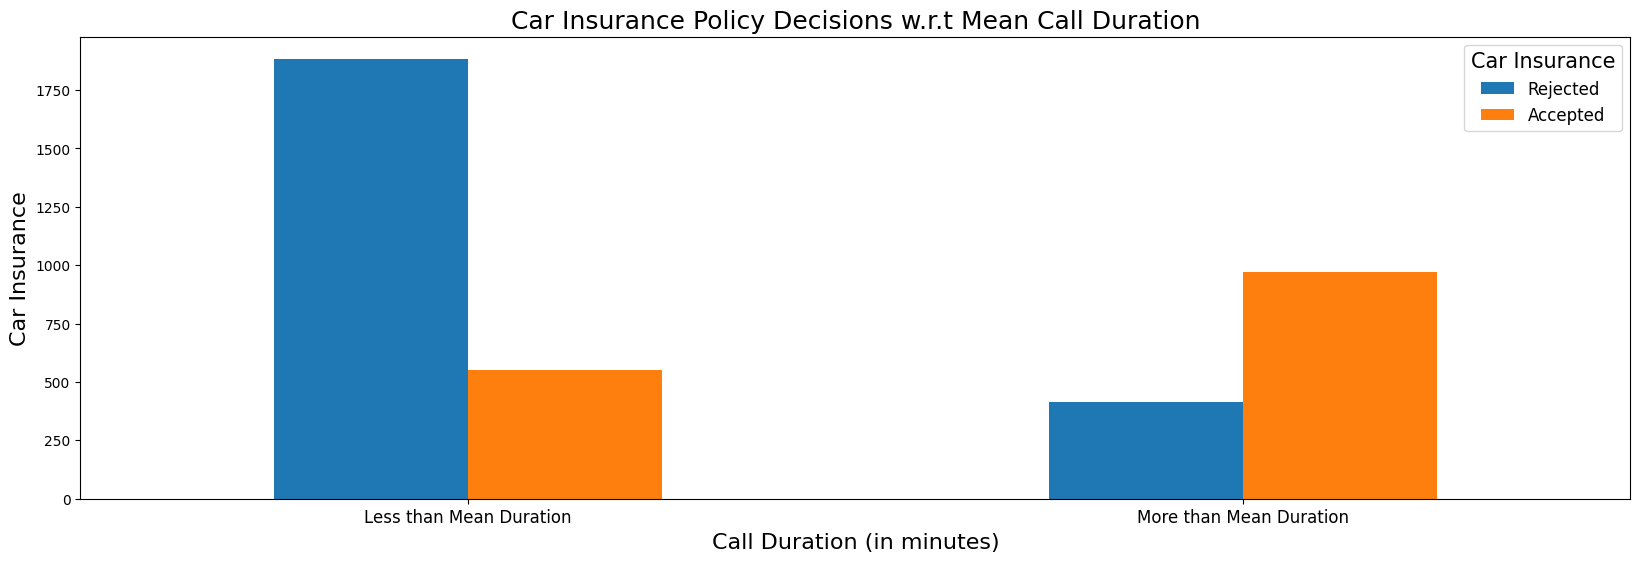

In [35]:
# Plotting the above values.

Mean_Call_Duration_crosstab.drop(['Percentage Enrolled'], axis=1).plot(kind='bar',stacked=False,figsize=(20,6))
plt.xticks(rotation = 0,fontsize=12)
plt.xlabel('Call Duration (in minutes)',fontsize=16)
plt.ylabel('Car Insurance',fontsize=16)
plt.title('Car Insurance Policy Decisions w.r.t Mean Call Duration',fontsize=18)
plt.legend(['Rejected','Accepted'],title='Car Insurance',title_fontsize=15,prop={"size":12})

In [42]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.datasets import make_classification 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
from matplotlib import pyplot 

import dmba

In [43]:
car_insurance_df = df2.copy()
car_insurance_df.head(2)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,26,may,5,-1,0,14:49:03,14:52:08,0


In [44]:
car_insurance_df.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [45]:
from datetime import datetime 
t3 = []
len = car_insurance_df.columns.shape[0] - 1

#car_insurance_df.shape[0]
for i in range(car_insurance_df.shape[0]):
    t1 = datetime.strptime(car_insurance_df.CallStart.values[i], "%H:%M:%S")
    t2 = datetime.strptime(car_insurance_df.CallEnd.values[i], "%H:%M:%S")
    t3.append(round((t2-t1).seconds/ 60))
car_insurance_df.insert(len, 'call_duration', t3)

In [46]:
car_insurance_df = car_insurance_df.drop(['Id', 'LastContactDay', 'LastContactMonth', 'CallStart', 'CallEnd'], axis = 1)
car_insurance_df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,2,-1,0,1,0
1,32,blue-collar,married,primary,0,1156,1,0,5,-1,0,3,0
2,29,management,single,tertiary,0,637,1,0,1,119,1,6,1
3,25,student,single,primary,0,373,1,0,2,-1,0,14,1
4,30,management,married,tertiary,0,2694,0,0,1,-1,0,3,0


# Applying KNN

In [47]:
car_insurance_df1 = car_insurance_df.copy()
car_insurance_df1.head(2)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,2,-1,0,1,0
1,32,blue-collar,married,primary,0,1156,1,0,5,-1,0,3,0


In [48]:
car_insurance_df1.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'call_duration', 'CarInsurance'],
      dtype='object')

In [49]:
car_insurance_df1.info()      # Checking the datatypes of the attributes 

<class 'pandas.core.frame.DataFrame'>
Index: 3820 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            3820 non-null   int64 
 1   Job            3820 non-null   object
 2   Marital        3820 non-null   object
 3   Education      3820 non-null   object
 4   Default        3820 non-null   int64 
 5   Balance        3820 non-null   int64 
 6   HHInsurance    3820 non-null   int64 
 7   CarLoan        3820 non-null   int64 
 8   NoOfContacts   3820 non-null   int64 
 9   DaysPassed     3820 non-null   int64 
 10  PrevAttempts   3820 non-null   int64 
 11  call_duration  3820 non-null   int64 
 12  CarInsurance   3820 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 546.9+ KB


In [50]:
le = preprocessing.LabelEncoder()
# converting the object datatype to numeric by applying LableEncoder 
##(['Job', 'Marital', 'Education])
car_insurance_df1['Job'] = le.fit_transform(car_insurance_df1['Job'])
car_insurance_df1['Marital'] = le.fit_transform(car_insurance_df1['Marital'])
car_insurance_df1['Education'] = le.fit_transform(car_insurance_df1['Education'])

In [51]:
car_insurance_df1.columns[:12]

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'call_duration'],
      dtype='object')

In [52]:
# Seperating predictor and Outcome column
predictors = car_insurance_df1.columns[:12]
outcome = car_insurance_df1.columns[-1]

In [53]:
X = car_insurance_df1[predictors]
y = car_insurance_df1[outcome]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.4, random_state = 2)

In [54]:
# Normalizing the data before applying algorithm
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Applying KNN algorithm
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
from sklearn.metrics import accuracy_score 
print("Training Accuracy :", accuracy_score(y_train, knn.predict(X_train)))
print("Testing Accuracy :", accuracy_score(y_test, knn.predict(X_test)))

Training Accuracy : 1.0
Testing Accuracy : 0.7303664921465969


**For K=1 Model overfits with giving Training Accuracy of 100%.**

In [57]:
## Calculating the training, testing accuracy and F1 Scores for different values of K ranging from 1 to 15. 
test = []
x = []
train = []
f_score = []
for i in range (1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    r2_test= accuracy_score(y_test, y_pred)
    r2_train= accuracy_score(y_train, knn.predict(X_train))
    x.append(i)
    test.append(r2_test) 
    train.append(r2_train)
    f_score.append(f1_score(y_test, y_pred))
print(pd.DataFrame({'K_values':x, 'Training_accuracy':train, 'Testing_accuracy':test, 'F1_score': f_score}).sort_values(by = ['Testing_accuracy'], 
                                                                                         ascending = False))

    K_values  Training_accuracy  Testing_accuracy  F1_score
10        11           0.798429          0.789921  0.708976
12        13           0.794939          0.789921  0.707916
13        14           0.780977          0.785995  0.688275
8          9           0.802356          0.785340  0.704505
11        12           0.781414          0.784686  0.685769
6          7           0.811955          0.784031  0.708995
9         10           0.793630          0.779450  0.675650
4          5           0.821553          0.777487  0.699647
7          8           0.796684          0.776178  0.672414
5          6           0.797120          0.772906  0.666025
2          3           0.855148          0.765052  0.681455
3          4           0.817190          0.759817  0.636993
1          2           0.849913          0.740183  0.583421
0          1           1.000000          0.730366  0.653199


**After arranging the records by decreasing value of accuracy score, we found that for K = 11, testing accuracy for K= 11 is highest and there is no significant difference between training and testimg accuracy. So, we will choose K = 11 for training the model.**

In [58]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Accuracy Score:  0.8495456187294576


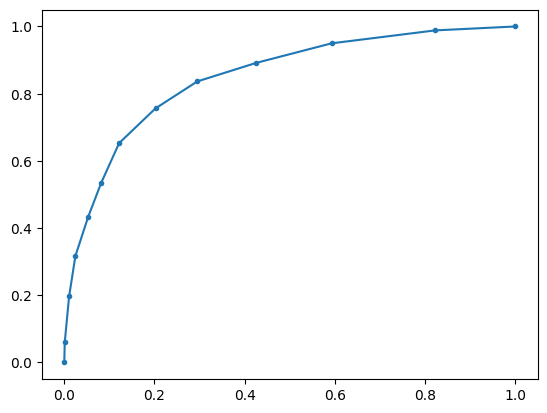

In [59]:
KNN_probs = knn.predict_proba(X_test)
KNN_probs = KNN_probs[:, 1]

KNN_auc = roc_auc_score(y_test, KNN_probs)
print('Accuracy Score: ', KNN_auc)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
pyplot.plot(KNN_fpr, KNN_tpr, marker = '.', label = 'KNN')
pyplot.show()

# Applying Naive-Bayes

In [60]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pylab as plt

import dmba
from dmba import classificationSummary, gainsChart

In [61]:
car_insurance_df2 = car_insurance_df.copy()
car_insurance_df2.head(1)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,2,-1,0,1,0


In [62]:
le = preprocessing.LabelEncoder()
#Converting the catr=egorical variable to numeric (['Job', 'Marital', 'Education])
car_insurance_df2['Job'] = le.fit_transform(car_insurance_df1['Job'])
car_insurance_df2['Marital'] = le.fit_transform(car_insurance_df1['Marital'])
car_insurance_df2['Education'] = le.fit_transform(car_insurance_df1['Education'])

In [63]:
X = car_insurance_df2[predictors]
y = (car_insurance_df2[outcome] == 1)
classes = [ 1, 0]
X['DaysPassed'] = np.clip(X['DaysPassed'], 0, None)  # Replecing -1 values with 0 

In [64]:
X.Age = [round(t/25) for t in X.Age]
X['Balance'] = np.clip(X['Balance'], 0, None)               # converting negative values to zero 
X.Balance = [round(s/2000) for s in X.Balance]

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [66]:
delays_nb = MultinomialNB(alpha = 0.01)

In [67]:
delays_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [68]:
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)

In [69]:
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)

In [70]:
# Training classification matrix
classificationSummary(y_train, y_train_pred, class_names = classes)

Confusion Matrix (Accuracy 0.6946)

       Prediction
Actual    1    0
     1 1138  235
     0  465  454


In [71]:
# Testing Classification matrix 
classificationSummary(y_valid, y_valid_pred, class_names = classes)

Confusion Matrix (Accuracy 0.6944)

       Prediction
Actual   1   0
     1 753 173
     0 294 308


In [72]:
f1_score(y_valid, y_valid_pred)

0.5687903970452447

**Getting 67% Accuracy using Naive-Bayes algorithm, which is much lesser as comared to KNN**

# Applying CART Algorithm

In [73]:
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [74]:
car_insurance_df3 = car_insurance_df.copy()
car_insurance_df3.head(2)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,2,-1,0,1,0
1,32,blue-collar,married,primary,0,1156,1,0,5,-1,0,3,0


In [75]:
le = preprocessing.LabelEncoder()
## Converting to numerical varibale (['Job', 'Marital', 'Education])
car_insurance_df3['Job'] = le.fit_transform(car_insurance_df3['Job'])
car_insurance_df3['Marital'] = le.fit_transform(car_insurance_df3['Marital'])
car_insurance_df3['Education'] = le.fit_transform(car_insurance_df3['Education'])

In [76]:
from sklearn.tree import export_graphviz
from sklearn import tree

X =car_insurance_df3[predictors]
y = car_insurance_df3[outcome]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.4, random_state = 11)

fullClassTree = DecisionTreeClassifier(random_state = 10)
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=10)

In [77]:
## Hyperparameter Tuning 
## Prunning the tree on basis of max_depth and calculating the accuracy at every stage
I = []
ta = []
tea =[]
f_Score = []

for i in range(1, 20):
    fullClassTree = DecisionTreeClassifier(random_state = 25, max_depth = i)
    fullClassTree.fit(train_X, train_y)
    I.append(i)
    ta.append(accuracy_score(train_y, fullClassTree.predict(train_X)))
    tea.append(accuracy_score(test_y, fullClassTree.predict(test_X)))
    f_Score.append(f1_score(test_y, fullClassTree.predict(test_X)))
print(pd.DataFrame({"max_depth": I, "Training_Acc": ta, "Testing_acc":tea, 'F1_Score': f_Score}))

    max_depth  Training_Acc  Testing_acc  F1_Score
0           1      0.753490     0.737565  0.648554
1           2      0.753490     0.737565  0.648554
2           3      0.803665     0.790576  0.732888
3           4      0.819372     0.777487  0.719008
4           5      0.825480     0.790576  0.722222
5           6      0.843805     0.789921  0.731830
6           7      0.860384     0.784686  0.728324
7           8      0.879581     0.784686  0.735743
8           9      0.898778     0.787958  0.739130
9          10      0.914049     0.774869  0.711409
10         11      0.934555     0.771597  0.710373
11         12      0.949825     0.772251  0.713816
12         13      0.962914     0.749346  0.686836
13         14      0.974695     0.751309  0.687500
14         15      0.986475     0.744764  0.681892
15         16      0.993892     0.736911  0.673701
16         17      0.996510     0.743455  0.677632
17         18      0.997818     0.741492  0.678077
18         19      0.998691    

**We will choose model for which testing accuracy is high and there is no much difference between training and testing accuracy. 
So, Max_depth is choosen as 3 to train the model.** 

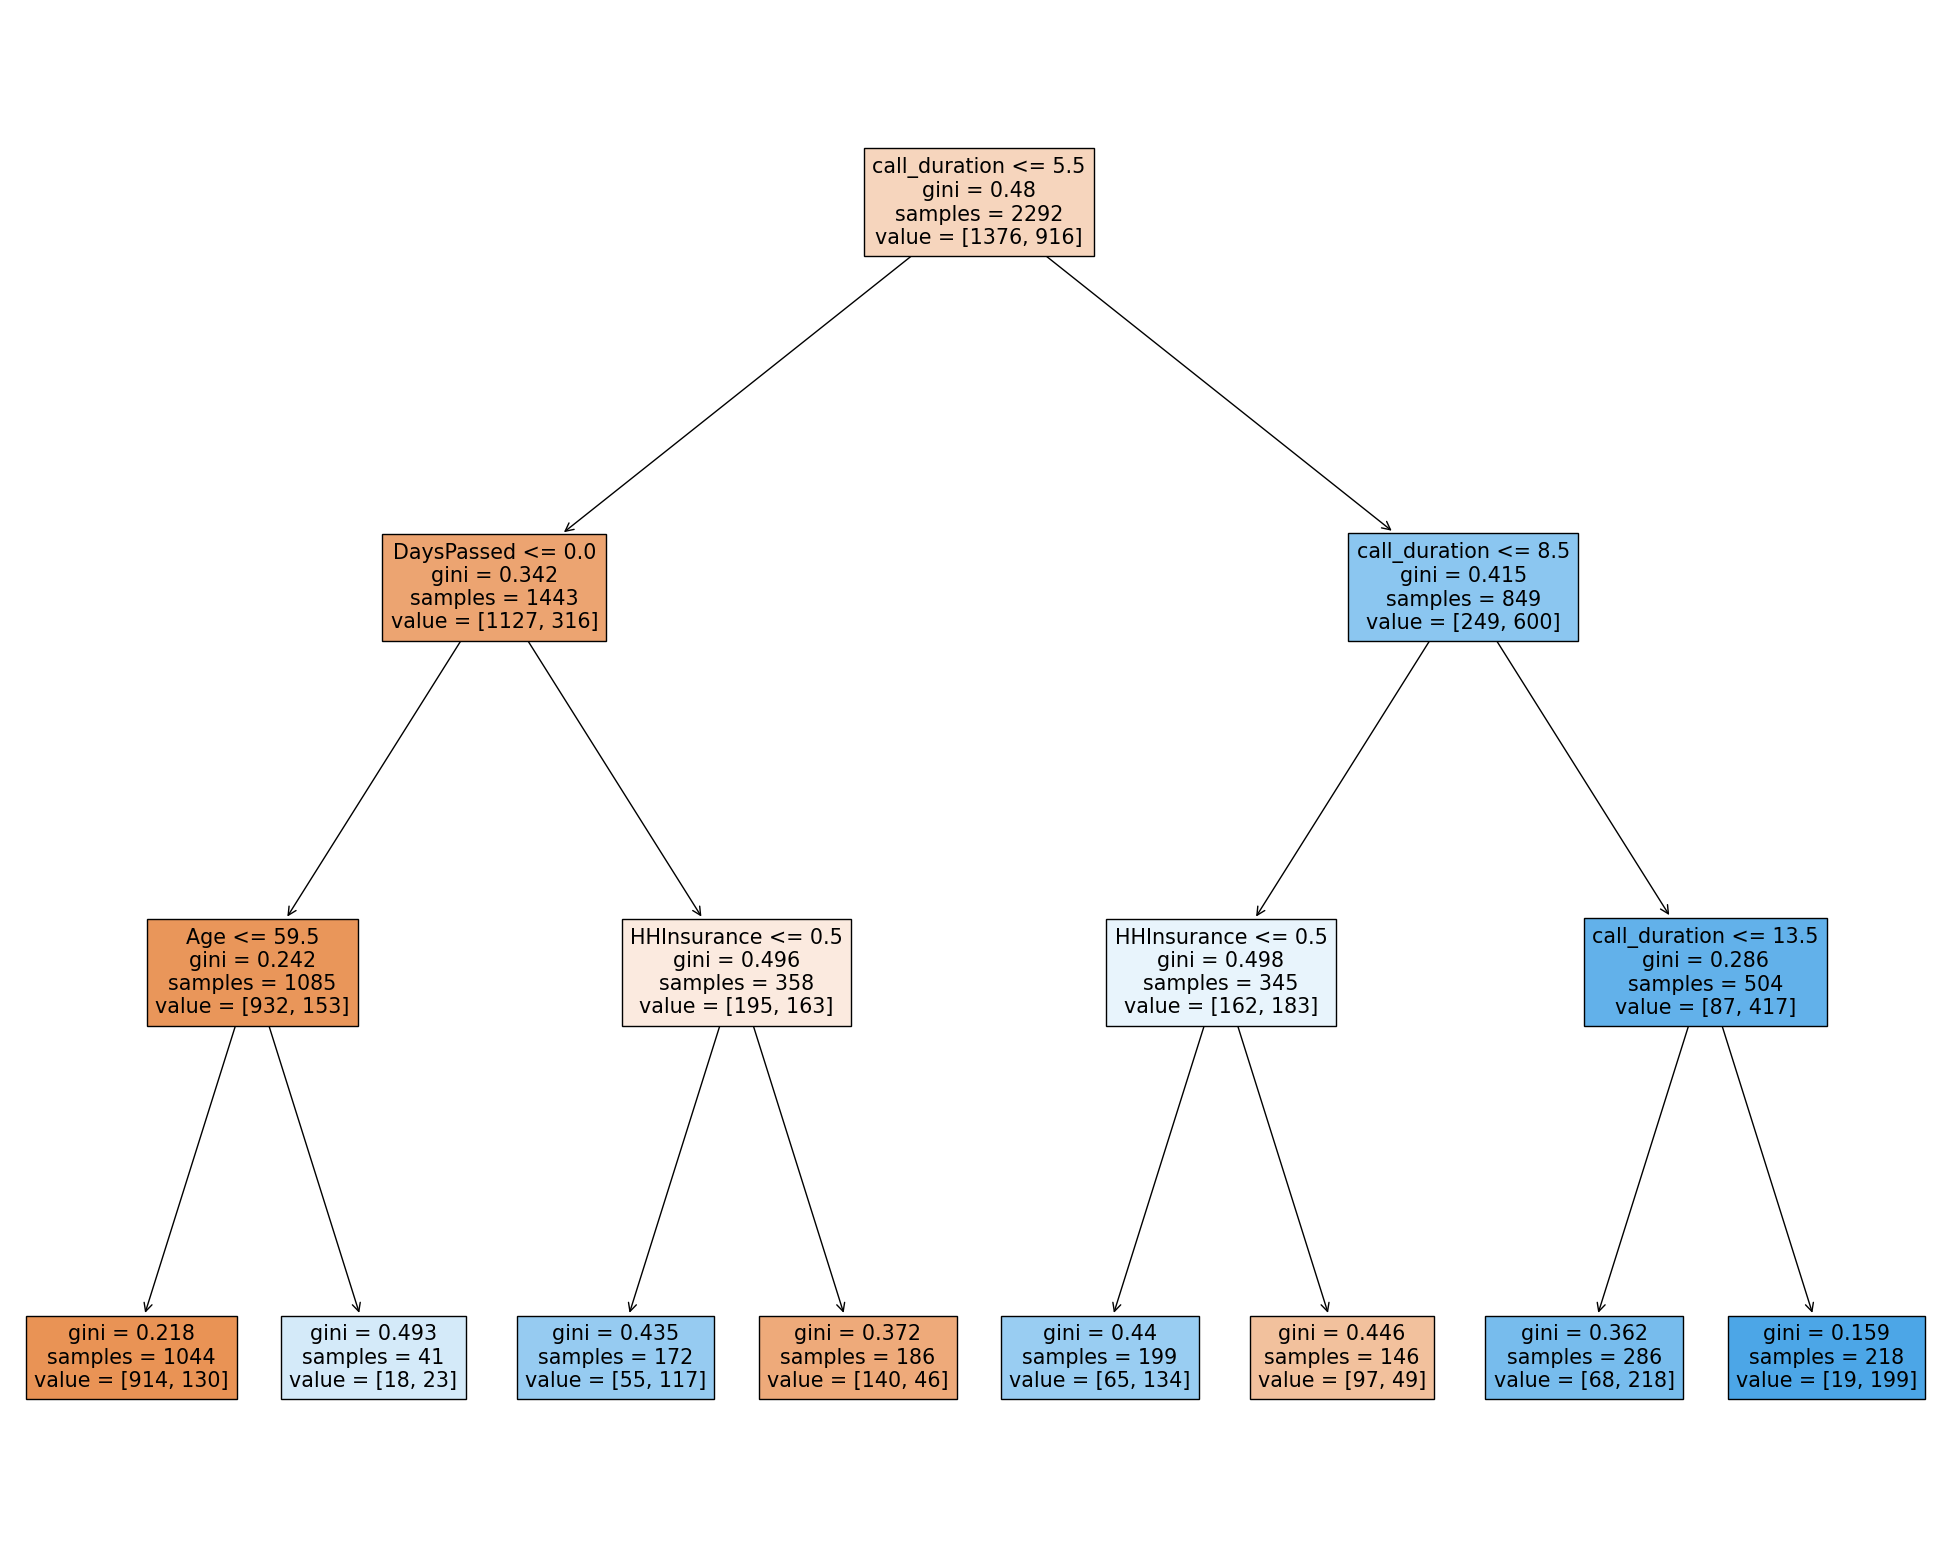

In [128]:
# Plotting the tree for maximum_depth = 3
fullClassTree = DecisionTreeClassifier(random_state = 25, max_depth = 3)
fullClassTree.fit(train_X, train_y)
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(fullClassTree, feature_names = train_X.columns.tolist(), filled = True)

In [129]:
from sklearn.metrics import recall_score

In [131]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(test_y, fullClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.8037)

       Prediction
Actual    0    1
     0 1151  225
     1  225  691
Confusion Matrix (Accuracy 0.7906)

       Prediction
Actual   0   1
     0 769 154
     1 166 439


In [133]:
train_recall = recall_score(train_y, fullClassTree.predict(train_X))
test_recall = recall_score(test_y, fullClassTree.predict(test_X))
print("Training Recall Score:", train_recall)
print("Test Recall Score:", test_recall)

Training Recall Score: 0.7543668122270742
Test Recall Score: 0.7256198347107438


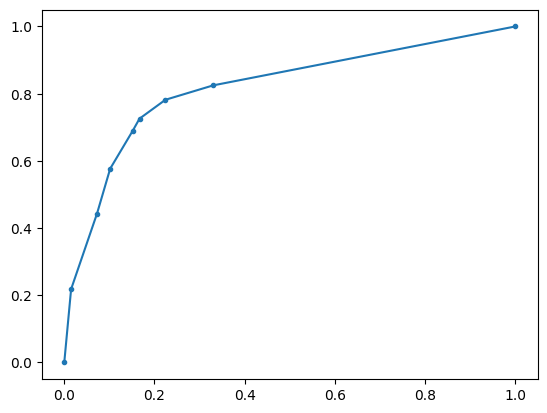

In [80]:
CART_probs = fullClassTree.predict_proba(test_X)
CART_probs = CART_probs[:, 1]

CART_auc = roc_auc_score(test_y, CART_probs)

CART_fpr, CART_tpr, _ = roc_curve(test_y, CART_probs)
pyplot.plot(CART_fpr, CART_tpr, marker = '.', label = 'CART')
pyplot.show()

**Maximum accuracy achieved using the CART algorithm is 78%.**

# Applying Random Forest

In [81]:
rf = RandomForestClassifier(n_estimators = 800, random_state = 1, min_samples_leaf = 50)
rf.fit(train_X, train_y)

RandomForestClassifier(min_samples_leaf=50, n_estimators=800, random_state=1)

In [82]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)

In [83]:
df = pd.DataFrame({'feature':train_X.columns, 'importance': importances, 'std':std})

In [84]:
df = df.sort_values('importance')
print(df)

          feature  importance       std
4         Default    0.000000  0.000000
7         CarLoan    0.002848  0.008475
3       Education    0.008127  0.012067
2         Marital    0.010873  0.017199
8    NoOfContacts    0.016185  0.019028
1             Job    0.018093  0.019434
0             Age    0.030733  0.033581
5         Balance    0.031859  0.030487
10   PrevAttempts    0.068020  0.079271
6     HHInsurance    0.082315  0.057785
9      DaysPassed    0.090949  0.093411
11  call_duration    0.639999  0.145831


In [85]:
classificationSummary(test_y, rf.predict(test_X))

Confusion Matrix (Accuracy 0.7945)

       Prediction
Actual   0   1
     0 781 142
     1 172 433


In [86]:
classificationSummary(train_y, rf.predict(train_X))

Confusion Matrix (Accuracy 0.8202)

       Prediction
Actual    0    1
     0 1200  176
     1  236  680


In [87]:
f1_score(test_y, rf.predict(test_X))

0.7338983050847459

In [88]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100,200]
}

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [91]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(min_samples_leaf=50,
                                              n_estimators=800,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [92]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       random_state=1)

In [93]:
rf_new  = RandomForestClassifier(n_estimators = 200, random_state = 1, min_samples_leaf = 5, max_depth = 20)
rf_new.fit(train_X, train_y)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [94]:
classificationSummary(test_y, rf_new.predict(test_X))

Confusion Matrix (Accuracy 0.7965)

       Prediction
Actual   0   1
     0 773 150
     1 161 444


In [95]:
classificationSummary(train_y, rf_new.predict(train_X))

Confusion Matrix (Accuracy 0.8752)

       Prediction
Actual    0    1
     0 1240  136
     1  150  766


# Applying Logistic Regression

In [96]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import dmba
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [97]:
car_insurance_df4 = car_insurance_df.copy()
car_insurance_df4.head(2)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,2,-1,0,1,0
1,32,blue-collar,married,primary,0,1156,1,0,5,-1,0,3,0


In [98]:
le = preprocessing.LabelEncoder()
##(['Job', 'Marital', 'Education])
car_insurance_df4['Job'] = le.fit_transform(car_insurance_df4['Job'])
car_insurance_df4['Marital'] = le.fit_transform(car_insurance_df4['Marital'])
car_insurance_df4['Education'] = le.fit_transform(car_insurance_df4['Education'])

In [99]:
X =car_insurance_df4[predictors]
y = car_insurance_df4[outcome]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.4, random_state = 11)

In [100]:
# Applying logistic Regression 
logit_reg = LogisticRegression(penalty= 'l1', tol = 0.0001, solver = 'liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(penalty='l1', solver='liblinear')

In [101]:
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index = X.columns))

                  coeff
Age            0.010628
Job            0.035324
Marital        0.231982
Education      0.332154
Default        0.000000
Balance       -0.000004
HHInsurance   -1.217148
CarLoan       -0.654266
NoOfContacts  -0.111550
DaysPassed     0.002647
PrevAttempts   0.135325
call_duration  0.333516


In [102]:
logit_reg_pred = logit_reg.predict(test_X)
logit_reg_proba = logit_reg.predict_proba(test_X)

In [103]:
logit_result = pd.DataFrame({'actual':test_y, 
                             'p0':[p[0] for p in logit_reg_proba], 
                             'p1':[p[1] for p in logit_reg_proba], 'predicted': logit_reg_pred}).sort_values('p1', ascending = False)
logit_result

,actual,p0,p1,predicted
1262,1,0.000013,0.999987,1
503,1,0.000114,0.999886,1
607,1,0.000144,0.999856,1
2858,1,0.000197,0.999803,1
2816,1,0.000264,0.999736,1
...,...,...,...,...
729,0,0.987594,0.012406,0
1748,0,0.990154,0.009846,0
1882,0,0.993641,0.006359,0
3297,0,0.995776,0.004224,0


In [141]:
print(classificationSummary(train_y, logit_reg.predict(train_X)))
print(classificationSummary(test_y, logit_reg.predict(test_X)))
print("F1_score: ", f1_score(test_y, logit_reg.predict(test_X)))
print('train_recall', recall_score(train_y, logit_reg.predict(train_X)))
print('test_recall', recall_score(test_y, logit_reg.predict(test_X)))

Confusion Matrix (Accuracy 0.7923)

       Prediction
Actual    0    1
     0 1198  178
     1  298  618
None
Confusion Matrix (Accuracy 0.7808)

       Prediction
Actual   0   1
     0 804 119
     1 216 389
None
F1_score:  0.6990116801437556
train_recall 0.6746724890829694
test_recall 0.6429752066115703


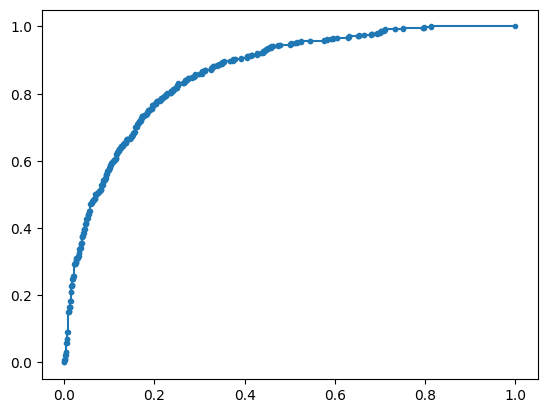

In [105]:
## ROC Curve 
lr_probs = logit_reg.predict_proba(test_X)
lr_probs = lr_probs[:, 1]

lr_auc = roc_auc_score(test_y, lr_probs)

lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic_Regreesion')
pyplot.show()

**Accuracy with logistic regression algorithm is 78%.** 

In [145]:
new_threshold = 0.1
train_predictions_new = (logit_reg.predict_proba(train_X)[:, 1] >= new_threshold).astype(int)
test_predictions_new = (logit_reg.predict_proba(test_X)[:, 1] >= new_threshold).astype(int)
print(classificationSummary(train_y, train_predictions_new))
print(classificationSummary(test_y, test_predictions_new))
print('train_recall', recall_score(train_y, train_predictions_new))
print('test_recall', recall_score(test_y, test_predictions_new))

Confusion Matrix (Accuracy 0.5794)

       Prediction
Actual   0   1
     0 421 955
     1   9 907
None
Confusion Matrix (Accuracy 0.5700)

       Prediction
Actual   0   1
     0 276 647
     1  10 595
None
train_recall 0.990174672489083
test_recall 0.9834710743801653


# **Applying Neural Network**

In [106]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

import dmba
from dmba import classificationSummary

%matplotlib inline

In [107]:
car_insurance_df_NN = car_insurance_df.copy()
car_insurance_df_NN.head(2)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,2,-1,0,1,0
1,32,blue-collar,married,primary,0,1156,1,0,5,-1,0,3,0


In [108]:
car_insurance_df_NN['Marital'].unique()

array(['single', 'married', 'divorced'], dtype=object)

In [109]:
le = preprocessing.LabelEncoder()
##(['Job', 'Marital', 'Education])
car_insurance_df_NN['Job'] = le.fit_transform(car_insurance_df_NN['Job'])
car_insurance_df_NN['Marital'] = le.fit_transform(car_insurance_df_NN['Marital'])
car_insurance_df_NN['Education'] = le.fit_transform(car_insurance_df_NN['Education'])

In [110]:
X = car_insurance_df_NN[predictors]
y = car_insurance_df_NN[outcome]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.4, random_state = 2)

In [111]:
clf = MLPClassifier(hidden_layer_sizes=(6), activation='logistic', solver='lbfgs',
                    random_state=3, max_iter = 5000)
clf.fit(X_train, y_train.values)

# training performance (use idxmax to revert the one-hot-encoding)
print(classificationSummary(y_train.values, clf.predict(X_train)))

# validation performance
print(classificationSummary(y_test, clf.predict(X_test)))

Confusion Matrix (Accuracy 0.7552)

       Prediction
Actual    0    1
     0 1041  329
     1  232  690
None
Confusion Matrix (Accuracy 0.7533)

       Prediction
Actual   0   1
     0 717 212
     1 165 434
None


In [112]:
car_insurance_df_NN_1 = car_insurance_df.copy()
car_insurance_df_NN_1.head(2)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,2,-1,0,1,0
1,32,blue-collar,married,primary,0,1156,1,0,5,-1,0,3,0


In [113]:
# partitioning data in X and y 
X = car_insurance_df_NN_1[predictors]
y = car_insurance_df_NN_1[outcome]

In [114]:
processed_new = pd.get_dummies(X, columns=['Job', 'Marital', 'Education'], drop_first = True)
processed_new

,Age,Default,Balance,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,call_duration,Job_blue-collar,...,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_married,Marital_single,Education_secondary,Education_tertiary
0,32,0,1218,1,0,2,-1,0,1,False,...,False,False,False,False,False,False,False,True,False,True
1,32,0,1156,1,0,5,-1,0,3,True,...,False,False,False,False,False,False,True,False,False,False
2,29,0,637,1,0,1,119,1,6,False,...,False,False,False,False,False,False,False,True,False,True
3,25,0,373,1,0,2,-1,0,14,False,...,False,False,False,True,False,False,False,True,False,False
4,30,0,2694,0,0,1,-1,0,3,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,28,0,0,1,0,1,40,2,4,False,...,False,False,False,False,True,False,False,True,False,True
3996,49,0,124,1,1,19,-1,0,2,False,...,False,False,False,False,False,False,False,False,True,False
3997,27,0,-400,0,1,1,-1,0,5,False,...,False,False,False,False,False,False,False,True,True,False
3998,36,0,658,1,0,1,227,3,2,False,...,False,False,False,False,False,False,False,True,False,True


In [115]:
# Splitting the data in training and testing data  
X_train, X_test, y_train, y_test= train_test_split(processed_new, y, test_size = 0.4, random_state = 2)

In [116]:
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs',
                    random_state=3, max_iter = 5000)
clf.fit(X_train, y_train.values)

# training performance (use idxmax to revert the one-hot-encoding)
print(classificationSummary(y_train.values, clf.predict(X_train)))

# validation performance
print(classificationSummary(y_test, clf.predict(X_test)))

Confusion Matrix (Accuracy 0.7914)

       Prediction
Actual    0    1
     0 1113  257
     1  221  701
None
Confusion Matrix (Accuracy 0.8050)

       Prediction
Actual   0   1
     0 770 159
     1 139 460
None


In [117]:
# Hyperparameter Tuning for differnt values of hidden layers and calculating the training, testing accuracy and F1_score 
i_values = []
training_accuracy = []
testing_accuracy = []
f_score = []

for i in range (1,6):
    clf = MLPClassifier(hidden_layer_sizes=(i), activation='logistic', solver='lbfgs',
                    random_state=3, max_iter = 5000)
    clf.fit(X_train, y_train.values)
    i_values.append(i)
    training_accuracy.append(accuracy_score(y_train.values, clf.predict(X_train)))
    testing_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    f_score.append(f1_score(y_test, clf.predict(X_test)))
print(pd.DataFrame({'Hidden_layers': i_values, 'Training_acc' : training_accuracy, 'Teating_acc': testing_accuracy, 'F1_score': f_score}))

   Hidden_layers  Training_acc  Teating_acc  F1_score
0              1      0.791449     0.804974  0.755337
1              2      0.791449     0.804974  0.758117
2              3      0.798429     0.799738  0.749180
3              4      0.794939     0.797120  0.749191
4              5      0.805846     0.806937  0.748079


In [118]:
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs',
                    random_state=3, max_iter = 5000)
clf.fit(X_train, y_train.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=1, max_iter=5000,
              random_state=3, solver='lbfgs')

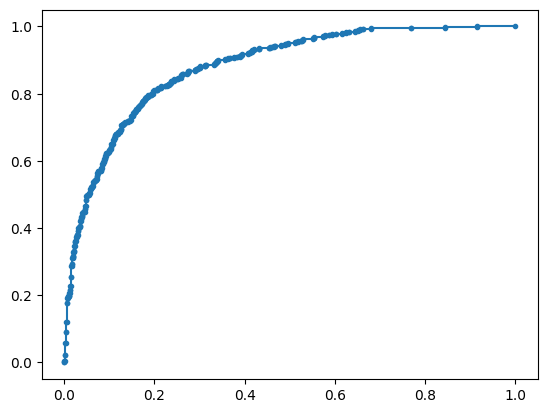

In [119]:
NN_probs = clf.predict_proba(X_test)
NN_probs = NN_probs[:, 1]

NN_auc = roc_auc_score(y_test, NN_probs)

NN_fpr, NN_tpr, _ = roc_curve(y_test, NN_probs)
pyplot.plot(NN_fpr, NN_tpr, marker = '.', label = 'Neural Network')
pyplot.show()

# Applying LDA 

In [120]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pylab as plt

import dmba
from dmba import classificationSummary

%matplotlib inline

In [121]:
car_insurance_df_LDA = car_insurance_df.copy()

In [122]:
le = preprocessing.LabelEncoder()
##(['Job', 'Marital', 'Education])
car_insurance_df_LDA['Job'] = le.fit_transform(car_insurance_df_LDA['Job'])
car_insurance_df_LDA['Marital'] = le.fit_transform(car_insurance_df_LDA['Marital'])
car_insurance_df_LDA['Education'] = le.fit_transform(car_insurance_df_LDA['Education'])

In [123]:
X = car_insurance_df_NN[predictors]
y = car_insurance_df_NN[outcome]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.4, random_state = 4)

In [124]:
## Applying Linear discriminant analysis 
da_reg = LinearDiscriminantAnalysis()
da_reg.fit(X_train, y_train)

y_pred = da_reg.predict(X_test)
print("Training_Accuracy: ", accuracy_score(da_reg.predict(X_train), y_train))
print("Testing_Accuracy: ", accuracy_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))

Training_Accuracy:  0.7796684118673648
Testing_Accuracy:  0.7650523560209425
F1_score:  0.6616399622997172


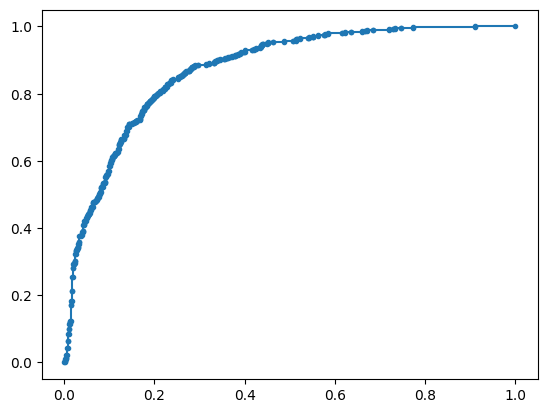

In [125]:
# ROC curve for LDA
lda_probs = da_reg.predict_proba(X_test)
lda_probs = lda_probs[:, 1]

lda_auc = roc_auc_score(y_test, lda_probs)

lda_fpr, lda_tpr, _ = roc_curve(y_test, lda_probs)
pyplot.plot(lda_fpr, lda_tpr, marker = '.', label = 'LDA')
pyplot.show() 

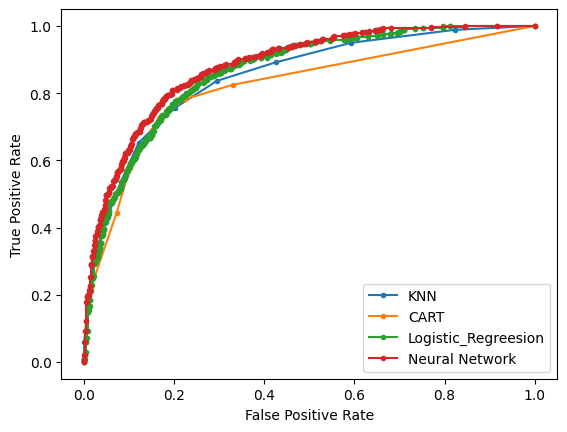

In [126]:
# Comparing ROC curve for models with good accuracy

pyplot.plot(KNN_fpr, KNN_tpr, marker = '.', label = 'KNN')
pyplot.plot(CART_fpr, CART_tpr, marker = '.', label = 'CART')
pyplot.plot(lr_fpr, lr_tpr, marker = '.', label = 'Logistic_Regreesion')
pyplot.plot(NN_fpr, NN_tpr, marker = '.', label = 'Neural Network')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**From ROC curve, we can see that for Neural Network, Logistic regression, and KNN AUC is maximum. Depened on scenario and data points we have to choose the model.**